In [54]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import walk

testpath = 'imagens_vq/teste'
testfiles = next(walk(testpath), (None, None, []))[2]

trainpath = 'imagens_vq/treino'
trainfiles = next(walk(trainpath), (None, None, []))[2]

recpath = 'imagens_vq/rec'
recfiles = next(walk(recpath), (None, None, []))[2]

Populating the interactive namespace from numpy and matplotlib


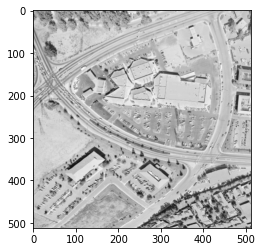

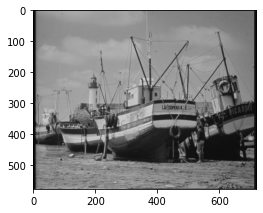

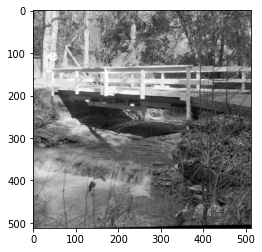

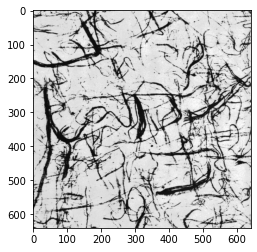

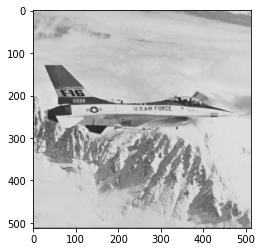

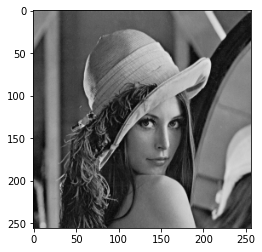

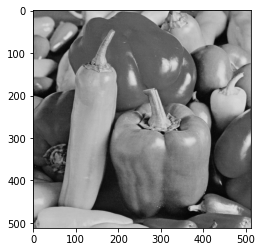

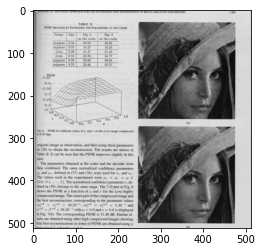

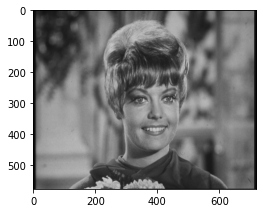

In [3]:
for i in range(0, len(trainfiles)):
    f, axarr = plt.subplots(1,1)
    f.set_figheight(4)
    f.set_figwidth(4)
    img = mpimg.imread(trainpath + '/' + trainfiles[i])
    axarr.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [62]:
import csv
p_df = csv.reader(open("./desempenhos/BestCDBK_20.csv"))
params = []
blocks = [1, 2, 2, 4, 8, 8, 16, 32, 32, 64];
for row in p_df:
    params.append(row)

params = np.array(params).astype(float)
params = params.astype(int)

In [57]:
recfiles38 = []
for file in recfiles:
    s = len(file)
    if file[s-6:s-4] == '38':
        recfiles38.append(file)
#         recfiles.remove(file)

recfiles25 = []
for file in recfiles:
    s = len(file)
    if file[s-6:s-4] == '25':
        recfiles25.append(file)

In [61]:
params

array([[   8,    4,    8, 2048],
       [   8,    4,    8, 4096],
       [   8,    8,    9,   64],
       [   8,    8,    9,   64],
       [   4,    2,    5, 1024]])

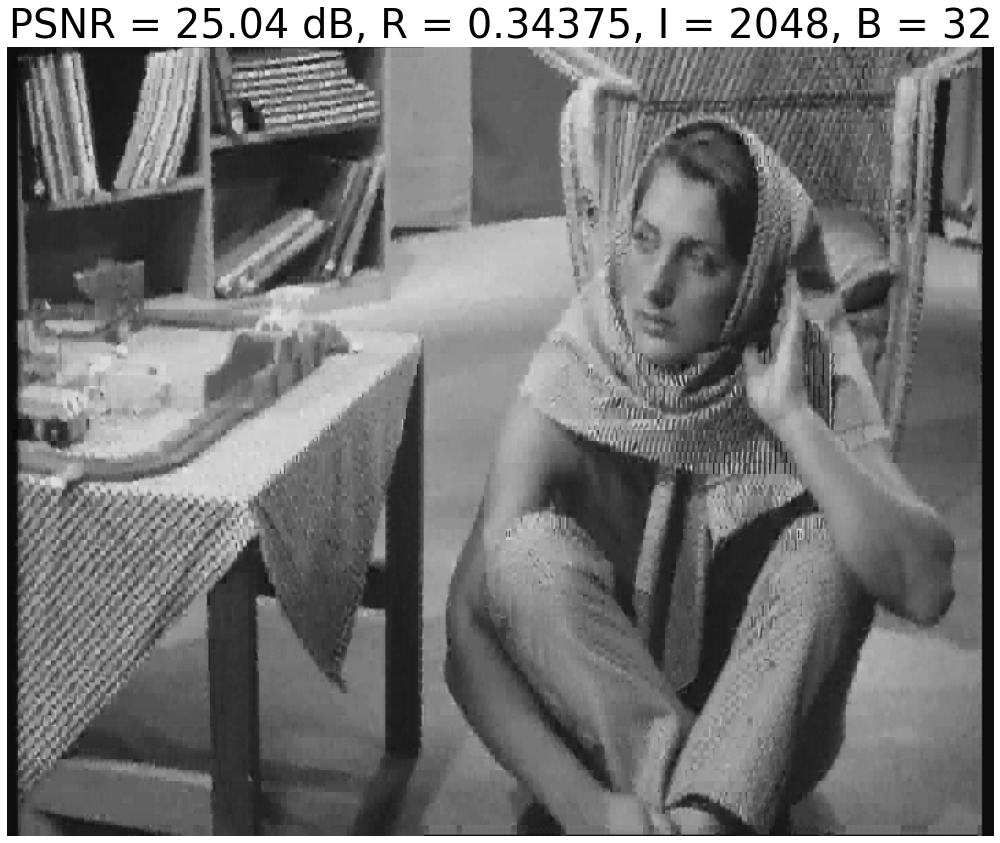

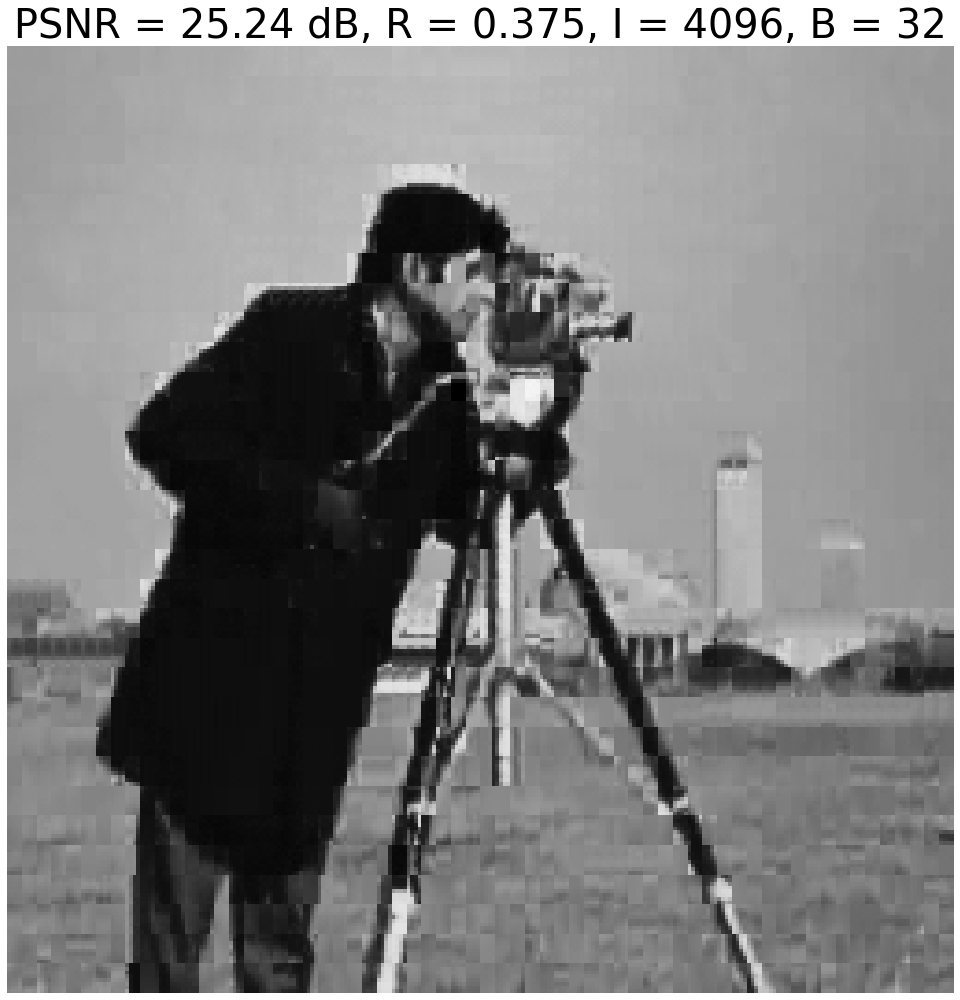

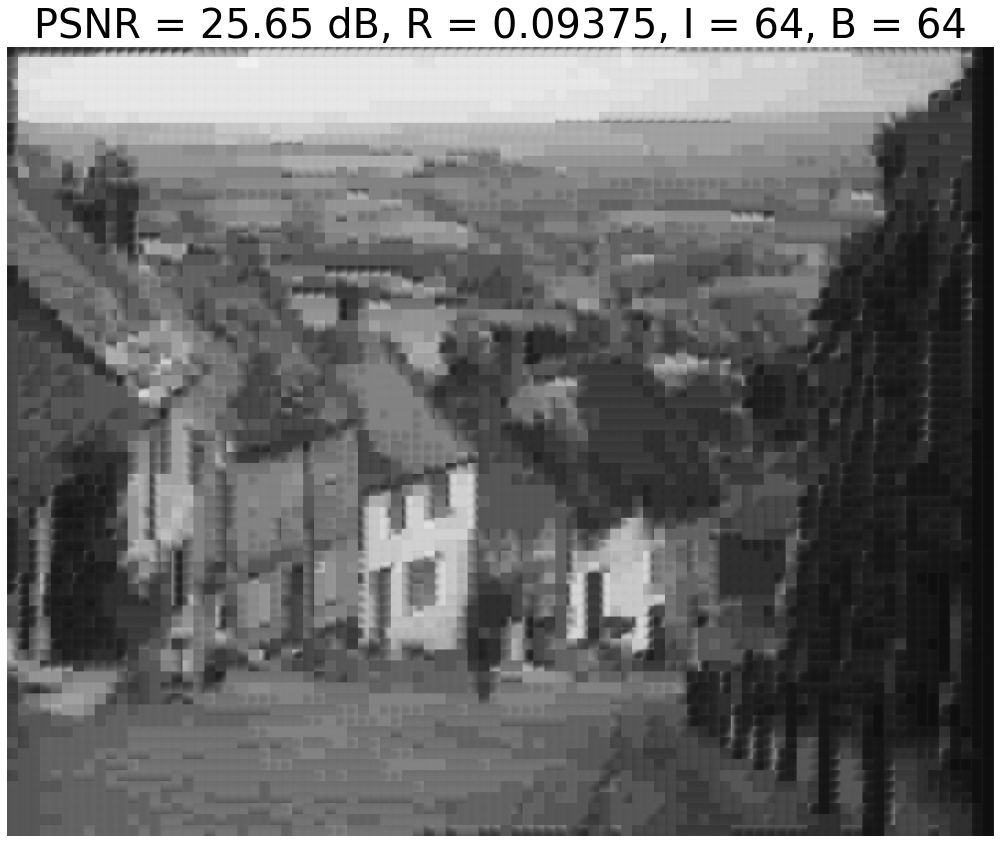

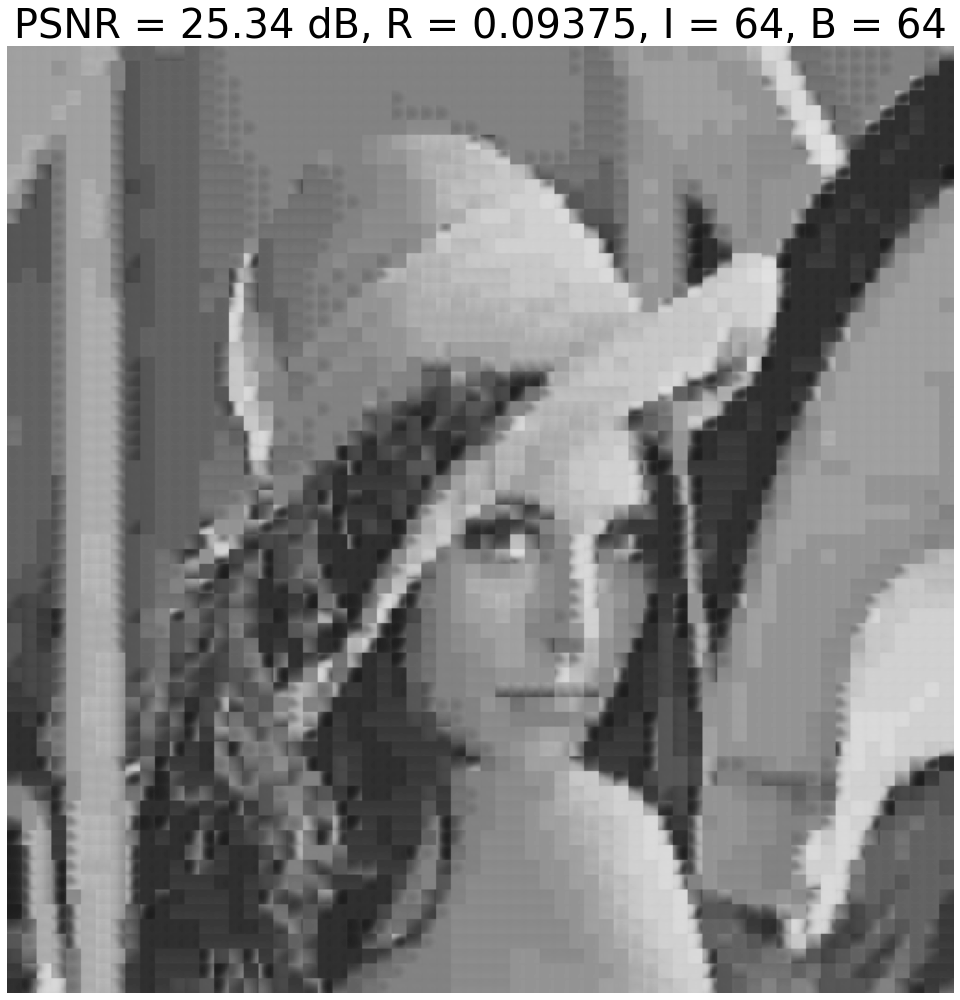

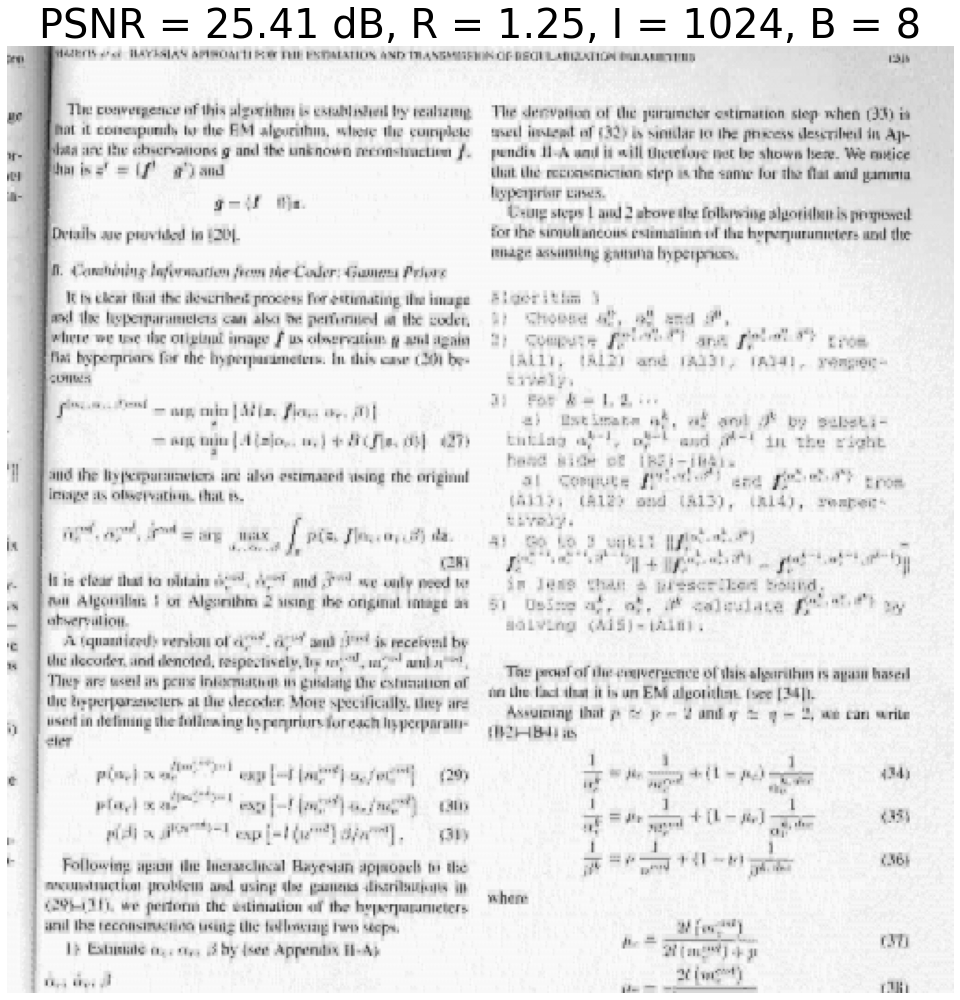

In [63]:
import cv2
for i in range(0, len(testfiles)):
    f, axarr = plt.subplots(1,1)
    
    f.set_figheight(14)
    f.set_figwidth(14)
    imgp1 = cv2.imread(testpath + '/' + testfiles[i])
    imgp2 = cv2.imread(recpath + '/' + recfiles25[i])
    psnr = cv2.PSNR(imgp1, imgp2)
    img = mpimg.imread(testpath + '/' + testfiles[i])
#     axarr[0].imshow(img, cmap='gray', vmin=0, vmax=255)
    img2 = mpimg.imread(recpath + '/' + recfiles25[i])
    axarr.imshow(img2, cmap='gray', vmin=0, vmax=255)
    R = log2(params[i, 3])/blocks[params[i, 2]]
    plt.axis('off')
    plt.title("PSNR = " + str(round(psnr,2)) +  " dB, R = " + str(R) + ", I = " + str(params[i, 3]) + ", B = " + str(int(blocks[params[i, 2]])), fontsize=40)
    plt.tight_layout()
    plt.savefig('imagens_vq/pngs/' + recfiles25[i] + '.png')
    plt.show()